## Logistic Regression 

In [1]:
# importing Libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.datasets import load_breast_cancer 
from sklearn.datasets import load_iris 

In [2]:
# Loading Data 
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# info. about my data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# describe Data 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# split data x,y 

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
# show data 

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [8]:
# split your data into the Training set and the Test set 

X_train, X_test , y_train , y_test = train_test_split(X,y , test_size = 0.25, shuffle =True )

In [9]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2


In [10]:
y_train.head()

109    1
87     1
242    0
195    0
267    0
Name: target, dtype: int64

In [11]:
# Feature Scaling 

# fit_transform(X[, y])  => Fit to data, then transform it.
# transform(X[, copy])   => Perform standardization by centering and scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train

array([[-0.47725098, -1.48228982, -0.92131686, ...,  1.009456  ,
        -0.68459481, -0.52392045],
       [-0.91943863,  0.6746319 ,  0.03803602, ...,  1.009456  ,
        -0.68459481,  1.10525683],
       [ 1.07040577,  0.6746319 , -0.92131686, ..., -0.60425183,
         1.27016018, -2.15309773],
       ...,
       [-0.36670407,  0.6746319 , -0.92131686, ...,  1.009456  ,
        -0.68459481,  1.10525683],
       [-0.91943863, -1.48228982,  0.99738889, ..., -2.21795966,
        -0.68459481, -0.52392045],
       [-1.02998554,  0.6746319 ,  0.03803602, ...,  1.009456  ,
        -0.68459481, -0.52392045]])

In [13]:
#Applying LogisticRegression Model 

'''
#linear_model.LogisticRegression(penalty='l2’,dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,
#                                class_weight=None,random_state=None,solver='warn’,max_iter=100,
#                                multi_class='warn’, verbose=0,warm_start=False, n_jobs=None)
'''

"\n#linear_model.LogisticRegression(penalty='l2’,dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,\n#                                class_weight=None,random_state=None,solver='warn’,max_iter=100,\n#                                multi_class='warn’, verbose=0,warm_start=False, n_jobs=None)\n"

In [14]:
# fitting the logistic regression to the Training set 
# object 

# Used to specify the norm used in the penalization.
# Algorithm to use in the optimization problem.
LogReg = LogisticRegression(penalty= 'l2', solver= 'sag', random_state = 33)

#fitting 

LogReg.fit(X_train, y_train)

LogisticRegression(random_state=33, solver='sag')

In [15]:
# calculating Details 

print('Model Train Score is : ', LogReg.score(X_train,y_train))
print('Model Test Score is : ', LogReg.score(X_test,y_test))
print('Model classes are : ', LogReg.classes_)
print('Model No. of iterations is: ', LogReg.n_iter_)




Model Train Score is :  0.8634361233480177
Model Test Score is :  0.8157894736842105
Model classes are :  [0 1]
Model No. of iterations is:  [28]


## There are 3 different APIs for evaluating the quality of a model’s predictions:

__Estimator score method:__ Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve. 

__Scoring parameter:__ Model-evaluation tools using __cross-validation__ (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy. 

__Metric functions:__ The sklearn.metrics module implements functions assessing prediction error for specific purposes. These metrics are __Classification__ metrics, __Multilabel ranking__ metrics, __Regression__ metrics and __Clustering__ metrics.

In [16]:
# calculating Prediction 

y_pred = LogReg.predict(X_test)

In [17]:
print('Predicted Value for model  is : ', y_pred[:20])
print('Real Value is : ',list(y_test[:20]))

Predicted Value for model  is :  [1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0]
Real Value is :  [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0]


In [18]:
# Calculating Confusion Matrix

# Compute confusion matrix to evaluate the accuracy of a classification.

cm = confusion_matrix(y_test, y_pred)
print('confusion matrix is :\n', cm)

confusion matrix is :
 [[23  8]
 [ 6 39]]


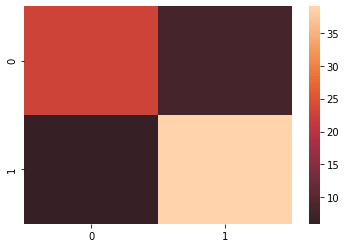

In [19]:
# plotting the confusion matrix

# The value at which to center the colormap when plotting divergant data

sns.heatmap(cm , center = True)
plt.show()

In [20]:
 # classification report to calculate percision  recall   f1-score  suport 
    
classReport = classification_report(y_test, y_pred)
print('fully Classification report is : \n\n', classReport)

fully Classification report is : 

               precision    recall  f1-score   support

           0       0.79      0.74      0.77        31
           1       0.83      0.87      0.85        45

    accuracy                           0.82        76
   macro avg       0.81      0.80      0.81        76
weighted avg       0.81      0.82      0.81        76



In [21]:
# load breast cancer dataste 

cancer = load_breast_cancer()
print('features names are :', cancer.feature_names)
print('------------------------------')
print('target name is :', cancer.target_names)

features names are : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
------------------------------
target name is : ['malignant' 'benign']


In [22]:
# X,y 

X = cancer.data
y = cancer.target 



In [23]:
# spiltting your data

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.33, random_state=44 , shuffle=True )

In [24]:
# model 

log = LogisticRegression(penalty = 'l2', solver = 'sag')
log.fit(X_train, y_train)

c:\users\code\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='sag')

In [25]:
# calculating Details 

print('Model Train Score is : ', log.score(X_train,y_train))
print('Model Test Score is : ', log.score(X_test,y_test))
print('Model classes are : ', log.classes_)
print('Model No. of iterations is: ', log.n_iter_)

Model Train Score is :  0.889763779527559
Model Test Score is :  0.9414893617021277
Model classes are :  [0 1]
Model No. of iterations is:  [100]


In [26]:
# calculating prediction 

y_pred= log.predict(X_test)

In [27]:
# calculating the confusion matrix 

conMatrix = confusion_matrix(y_test, y_pred)
print('confusion matrix is :\n', conMatrix)

confusion matrix is :
 [[ 59   9]
 [  2 118]]


<AxesSubplot:>

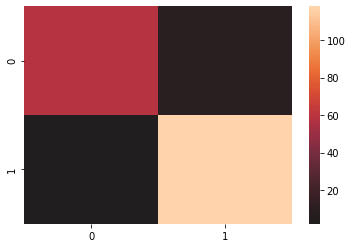

In [28]:
# plotting confusion matrix 

sns.heatmap(conMatrix, center = True)

## KNeighborsClassifier

In [29]:
# Loading data 

df = pd.read_csv('diabetes.csv')

In [30]:
# show data 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
# x, y 

X = df.drop(columns=['Outcome'])
y = df['Outcome'].values

In [32]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [33]:
y[:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [34]:
# spiltting your data into training set and test set 

X_train, X_test, y_train ,y_test = train_test_split(X,y , test_size = 0.2, shuffle =True)


In [35]:
#Applying KNeighborsClassifier Model 

'''
#sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform’, algorithm=’auto’, leaf_size=30,
#                                       p=2, metric='minkowski’, metric_params=None,n_jobs=None)
'''

"\n#sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform’, algorithm=’auto’, leaf_size=30,\n#                                       p=2, metric='minkowski’, metric_params=None,n_jobs=None)\n"

In [36]:
# Number of neighbors to use by default for kneighbors queries.

# weights{‘uniform’, ‘distance’} or callable, default=’uniform’
# weight function used in prediction. Possible values:

# ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

# ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

# Algorithm used to compute the nearest neighbors:

# ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

KNN = KNeighborsClassifier(n_neighbors = 5 , weights = 'uniform', algorithm = 'auto')
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
#Calculating Details

print('KNN Train Score is : ' , KNN.score(X_train, y_train))
print('KNN Test Score is : ' , KNN.score(X_test, y_test))

KNN Train Score is :  0.8029315960912052
KNN Test Score is :  0.7272727272727273


In [38]:
#Calculating Prediction

# Predict the class labels for the provided data.
# Return probability estimates for the test data X.

y_pred = KNN.predict(X_test)
y_pred_proba = KNN.predict_proba(X_test)

In [39]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [40]:
y_pred_proba

array([[0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8,

In [41]:
# Iris dataset 

iris = load_iris()

In [42]:
# X,y

X = iris.data 
y = iris.target 

print('Features names are  :', iris.feature_names)
print('-----------------------------------')
print('Target name is  :', iris.target_names)

Features names are  : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
-----------------------------------
Target name is  : ['setosa' 'versicolor' 'virginica']


In [43]:
# split your data into 

X_train , X_test , y_train , X_test = train_test_split(X,y , test_size = 0.4)

In [44]:
k_range = range(1,26)
scores = []

In [45]:
# Accuracy classification score.

#In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly
# match the corresponding set of labels in y_true.

# try diff K values 

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test , y_pred) )
    
print(scores)

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 0 1 2 0 2 0 1 0 0 0 2 0 1 2 2 2 1 0 1 0 0 1 1 2 1 1 0 1 2 0 2 1 1 1
 1 1 1 2 0 0 2 2 1 1 2 2 1 0 2 0 1 2 1 2 2 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# plot diff K with accuracy score 

plt.plot(k_range, scores )
plt.xlabel('K values in KNN Classifier')
plt.ylabel('Testing Accuracy')